# Day 5 Pandas:

This exercise is all about pandas!

![](multi_panda.gif)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1 Create DataFrames

We want to create some DataFrames with given structure, therefore fill the values with random numbers or categories.
- create one Dataframe by joining two Series, one with the category fruits, which has at least 5 different fruits. the other Series represent the price
- create a 24 x 7 numpy array, and build a DataFrame from it. The column index should be the days of the week, while the row index are the hours.
- write a dictionary containing cities. The city's name should be the key, and the following tuple should be the value for each key: _(population, name-of-country, isCapital, size, location-lat, location-long)_ (google some cities)

In [ ]:
# Problem 1
fruits_categories = ["apple","banana","watermelon","orange","dragon_fruit","kaki", "kiwi"]
fruits_prices = np.round(np.random.rand(len(fruits_categories)) *10, decimals=2)

s1 = pd.Series(fruits_categories, dtype="category", name="name")
s2 = pd.Series(fruits_prices, name="price")

df = pd.concat([s1,s2],axis=1)
df

In [ ]:
# Problem 2
data = np.random.rand(24,8) *10

# not really what we are looking for
#col_index = [pd.date_range(start="2020", periods=7, freq="1D")]

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.day_name.html#pandas.Series.dt.day_name
col_index = pd.date_range(start='2018-01-01', freq='D', periods=8).day_name() # had to look for this!
row_index = pd.timedelta_range(start=0, periods=24, freq="1H")

df = pd.DataFrame(data, columns=col_index, index=row_index)
df.head(3)

In [ ]:
df["Monday"]

## 2 Analyze Data

We want to analyze some data about some car seller. Therefore load the csv file *Automobile_data.csv*. Since the data is not fully clean, Replace all column values which contain ‘?’ and n.a with np.NaN.

Afterwards answer the following questions:
- whats the most expensive car's company name? Print out the car's index, company and price
- Count total cars per company
- Find each company’s Higesht price car
- Find the average mileage for a car of a company
- Whats the average price for a Toyota?
- do all Mercedes have more PS than Toyotas?


In [ ]:
df = pd.read_csv("Automobile_data.csv")
df = df.replace("?",np.NaN)
df.head(5)

In [ ]:
#problem
df.columns

In [ ]:
# problem 1
df[(df.price.max()==df.price)][['company',"price"]]

In [ ]:
df.loc[df.price.idxmax(),['company',"price"]]

In [ ]:
# problem 2
df.company.value_counts()

In [ ]:
# problem 3
df.groupby("company")["price"].max()

In [ ]:
# problem 3
df.loc[df.groupby("company")["price"].idxmax()]

In [ ]:
# problem 4
df.groupby("company")["average-mileage"].mean()

In [ ]:
# are all mercedes more expensive than volvos?

In [ ]:
benz = df[(df.company == "mercedes-benz")]["horsepower"]
volvo = df[(df.company == "volvo")]["horsepower"]

In [ ]:
benz = benz.reset_index(drop=True)
benz

In [ ]:
volvo

In [ ]:
benz.min() > volvo.max() 

In [ ]:
df.columns

## 3 Plotting

Your employer wants to finally get to know his employers. Help him by reading the dataset in _employees.xlsx_ and creating the following plots:
- a histogram for the distrubution of age, with bin size = 5
- a bar chart showing the count for each country

Also, find out the most frequent name of the employees. Whats the likelihood your employer will call the next worker by his correct name? Assume he only remembers the most frequent one.


In [ ]:
df_employ = pd.read_excel("employees.xlsx")

df_employ.hist("Age",bins=20)
plt.xlim(0,100)
plt.grid(False)
plt.show()

In [ ]:
df_employ.Country.value_counts().plot.bar(color=["r","g","b"])

#labels = series_counts_country.index
#pos = [0,1,2]

#plt.bar(pos,series_counts_country, color =["r","g","b"])
#plt.xticks(pos,labels)
#plt.ylabel("Count")
#plt.title("Workers per country")
plt.show()

In [ ]:
# Most frequent name
df_employ = df_employ.drop_duplicates("Id")
1/df_employ["Last Name"].value_counts().size*100
#df_employ.columns

## 4 One Hot Encoding with Pandas

use the function `pandas.get_dummies()` to one-hot-encode our dataset in _NewStudentPerformance.csv_. The documentation is here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html. Create a sub-Dataframe, which holds only numerical values. Compare your result with the result in exercise 4.4. You will probably need to move some columns arround, to match the columns! 
Do I have the same encoding?


In [ ]:
# hot encoding
df_stu = pd.read_csv("NewStudentPerformance.csv")
#print(df_stu.dtypes)
cols_num = df_stu.select_dtypes("int64").columns

cols_cat = df_stu.select_dtypes("object").columns


cols_cat = cols_cat.drop("ids")

print(cols_cat)

hot_data = pd.get_dummies(df_stu, columns=cols_cat)
hot_data.head(2)

# necessary for comparison
hot_data = hot_data.reindex(sorted(hot_data.columns), axis=1)
hot_data = hot_data.drop("ids", axis=1)
hot_data = hot_data.astype("uint8")

# compare to hot from file
hot_df2 = pd.read_csv("../day_4/hot_data.csv", dtype="uint8")
hot_df2 = hot_df2.reindex(sorted(hot_df2.columns), axis=1)
#hot_df2.dtypes

In [ ]:
hot_df2.equals(hot_data)

## 4.1 Custom Index

Extend our dataset with a custom Index, where the index should be the ID of the students. To make sure you implemented the `Index` correctly, try to access students over their ID.

In [9]:
df_stu_new = pd.read_csv("NewStudentPerformance.csv")
new_index = df_stu_new["ids"]
df_stu_new = df_stu_new.set_index(new_index)
df_stu_new = df_stu_new.drop("ids", axis=1)
df_stu_new.loc["'6480'"]
#df_stu_new.dtypes

python score                                  89
writing score                                 74
lunch                                   standard
race/ethnicity                           group B
gender                                    female
reading score                                 72
parental level of education    bachelor's degree
math score                                    72
test preparation course                     none
Name: '6480', dtype: object

## 5 Advanced: Crime Analyst

You work for the CIS (or BND, just something kinda cool). Your task is to help to prevent crime using data. Therefore read the file _crime.csv_ (this is a very big file, might take some tim to load. You can also cut it by slicing it...) 

First:
- remove the column "SHOOTING", 
- Clean the data, by droping all rows where the data is not complete

fulfill the following tasks:

- in a bar chart, plot the count for each crime type (use the column OFFENSE_CODE_GROUP)
- whats the most crimeful day of the week? month? year?
- show the average crimes per hour in a line chart(x-hour, y-avg no. crime)
- for each district, find the street with the most crimes
- For each district, predict the exact location for the next Robbery!

In [11]:
# read data and clean
df = pd.read_csv("crime2.csv")
df = df.drop("SHOOTING",axis=1)
df = df.dropna(how='any')

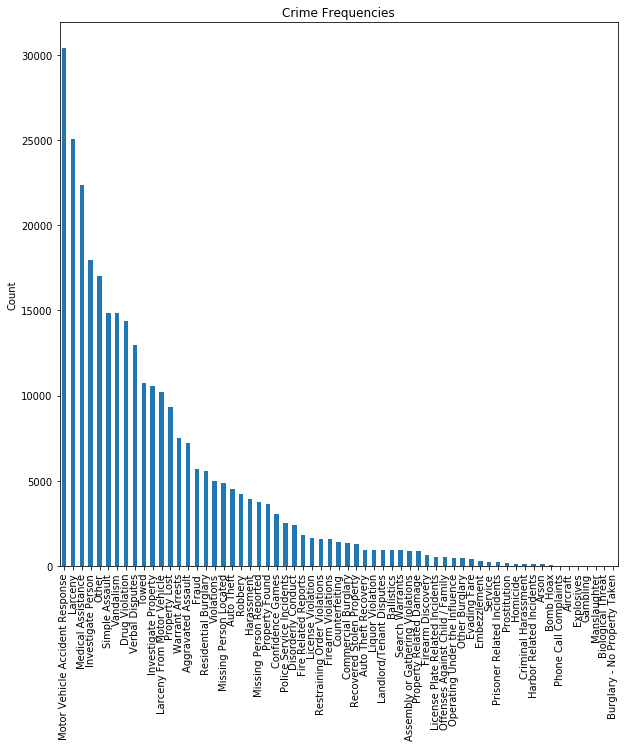

In [19]:
plt.figure(figsize=(10,10))

df.OFFENSE_CODE_GROUP.value_counts().plot.bar(title="Crime Frequencies")

#labels = crime_type_count.index
#pos = list(range(len(labels)))


#plt.bar(pos,crime_type_count)
#plt.xticks(pos,labels,rotation='90')
plt.ylabel("Count")
#plt.title("Crime Frequencies")
plt.show()

In [20]:
# most crimeful day of the week
df["DAY_OF_WEEK"].value_counts().idxmax()

'Friday'

In [21]:
# most crimeful YEAR
df["MONTH"].value_counts().idxmax()

8

In [22]:
# most crimeful day of the week
df["YEAR"].value_counts().idxmax()

2017

In [ ]:
# plot average number of crimes per hour

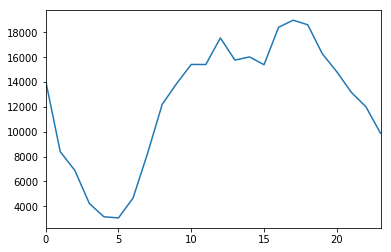

In [23]:
df.HOUR.value_counts().sort_index(ascending=True).plot()
#x = y.index

#plt.plot(x,y)
plt.show()

In [ ]:
# for each district, find the street with the most crimes

In [26]:
df1 = df.groupby("DISTRICT")["STREET"].value_counts().groupby(["DISTRICT"]).idxmax()
#districts = df1.index
df1

DISTRICT
A1         (A1, WASHINGTON ST)
A15      (A15, BUNKER HILL ST)
A7             (A7, BORDER ST)
B2         (B2, WASHINGTON ST)
B3         (B3, BLUE HILL AVE)
C11      (C11, DORCHESTER AVE)
C6     (C6, MASSACHUSETTS AVE)
D14    (D14, COMMONWEALTH AVE)
D4           (D4, BOYLSTON ST)
E13           (E13, CENTRE ST)
E18       (E18, HYDE PARK AVE)
E5         (E5, WASHINGTON ST)
Name: STREET, dtype: object

In [27]:
## get the average for each district 

## create data frame where 

df3 = df[df.OFFENSE_CODE_GROUP=="Robbery"]
#df3 = df.groupby("DISTRICT")[["OFFENSE_CODE_GROUP"]=="Robbery"].mean()
df3.groupby("DISTRICT")["Lat","Long"].mean()

,Lat,Long
DISTRICT,,
A1,42.355363,-71.060495
A15,42.377127,-71.061156
A7,42.376805,-71.032605
B2,42.263631,-70.992904
B3,42.286576,-71.086255
C11,42.299111,-71.063906
C6,42.331370,-71.055793
D14,42.351837,-71.139972
D4,42.342590,-71.080167


In [ ]:
df.columns